

# Project: Investigate Appointment No Shows Data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#dr">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.


## Context
>A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
If this help you studying or working, please don´t forget to upvote :). Reference to Joni Hoppen and Aquarela Advanced Analytics Aquarela



## Content
>110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names are self-explanatory, if you have doubts, just let me know!


## Data Dictionary
* 01 - PatientId
        Identification of a patient
* 02 - AppointmentID
        Identification of each appointment
* 03 - Gender
        Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
* 04 - DataMarcacaoConsulta
        The day of the actuall appointment, when they have to visit the doctor.
* 05 - DataAgendamento
        The day someone called or registered the appointment, this is before appointment of course.
* 06 - Age
        How old is the patient.
* 07 - Neighbourhood
        Where the appointment takes place.
* 08 - Scholarship
        True of False .
* 09 - Hipertension
        True or False
* 10 - Diabetes
        True or False
* 11 - Alcoholism
        True or False
* 12 - Handcap
        True or False
* 13 - SMS_received
        1 or more messages sent to the patient.
* 14 - No-show
        True or False.
* 15 - Inspiration
        What if that possible to predict someone to no-show an appointment?

<a id='dr'></a>
# Data Wrangling Process

# 01.Gathering Data

In [43]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


# 02.Assess Data

In [2]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## After assessing our data I found that :
* we have a large data set that has 110527 rows(samples) & 14 columns 
* luckily we don't have duplicated rows and any missing values
* but we have some wrong data types in 
        ScheduledDay & AppointmentDay should be DateTime not object
        gender should be categorical
* so our data isn't clean 

# 03.Clean Data

- we have a lot of columns that will not benefit us like 
    * ScheduledDay
    * AppointmentDay
    * PatientId
    * AppointmentID 



In [10]:
df.drop(columns=['ScheduledDay','AppointmentDay','PatientId','AppointmentID'],inplace=True)


In [11]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
df['Gender']=df['Gender'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Gender         110527 non-null  category
 1   Age            110527 non-null  int64   
 2   Neighbourhood  110527 non-null  object  
 3   Scholarship    110527 non-null  int64   
 4   Hipertension   110527 non-null  int64   
 5   Diabetes       110527 non-null  int64   
 6   Alcoholism     110527 non-null  int64   
 7   Handcap        110527 non-null  int64   
 8   SMS_received   110527 non-null  int64   
 9   No-show        110527 non-null  object  
dtypes: category(1), int64(7), object(2)
memory usage: 7.7+ MB


### Rename NO_Show Column

In [35]:
df.rename({'No-show':'No_show'},axis=1,inplace=True)


### clean Age Column


In [26]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [32]:
row_index=df[(df['Age']<0) | (df['Age']>100)].index
df.drop(index=row_index,inplace=True)

In [33]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 100,  99], dtype=int64)

In [34]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis



## Quick Look 

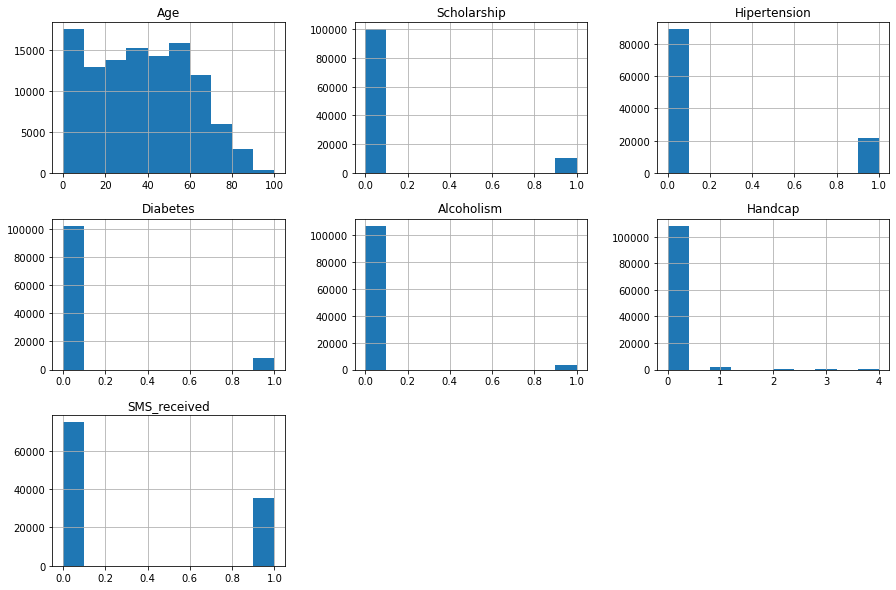

In [39]:
df.hist(figsize=(15,10));

In [40]:
df['No_show'].value_counts()

No     88203
Yes    22316
Name: No_show, dtype: int64

* her we have 88203 show & 22316 no Show

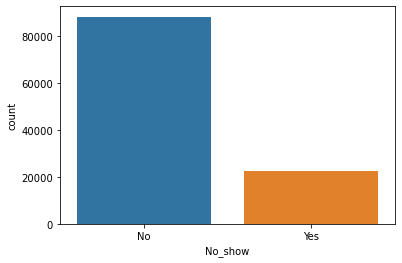

In [55]:
sns.countplot(x=df['No_show']);


## Dose gender affect noshow ?

In [49]:
df.groupby(['Gender','No_show'])['No_show'].count()

Gender  No_show
F       No         57241
        Yes        14591
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

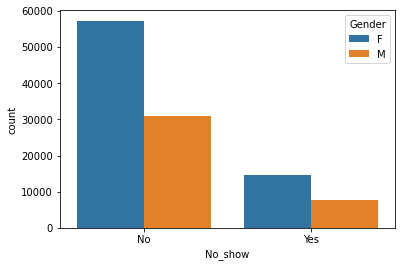

In [52]:
sns.countplot(x=df['No_show'],hue=df['Gender']);

- we see that femal mor than male in both cases Yes & No

## Dose age affect noshow ?

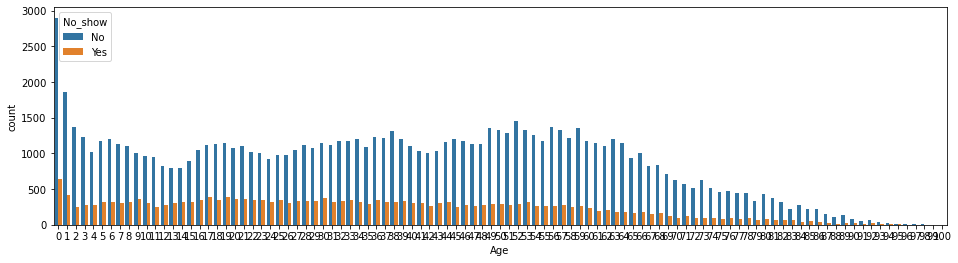

In [60]:
plt.figure(figsize=(16,4));
sns.countplot(x=df['Age'],hue=df['No_show']);


- Age has no effict

## Dose Neighbourhood affect noshow ?

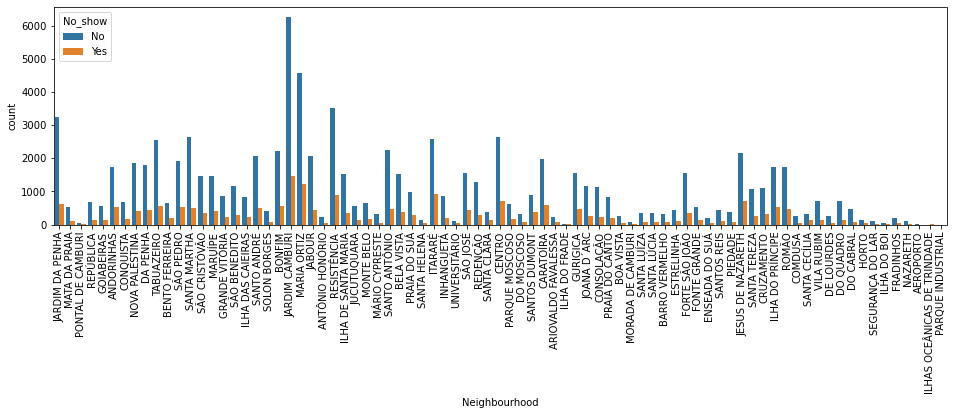

In [67]:
plt.figure(figsize=(16,4));
sns.countplot(x=df['Neighbourhood'],hue=df['No_show']);
plt.xticks(rotation=90);

- Neighbourhood affect data  JARDIM CAMBURI has most freqency

## Dose Scholarship affect noshow ?

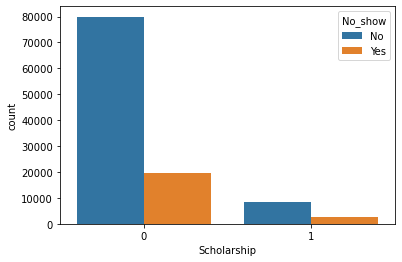

In [71]:

sns.countplot(x=df['Scholarship'],hue=df['No_show']);


- most of people who has no Scholarship answer no 

## Dose Diabetes affect noshow ?

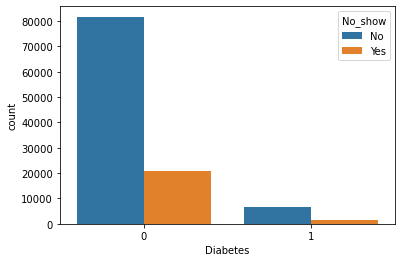

In [73]:
sns.countplot(x=df['Diabetes'],hue=df['No_show']);

- Same as Scholarship

## Dose Alcoholism affect noshow ?

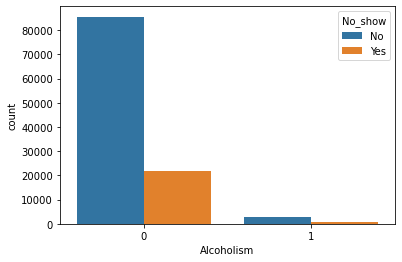

In [75]:
sns.countplot(x=df['Alcoholism'],hue=df['No_show']);

## Dose Handcap affect noshow ?

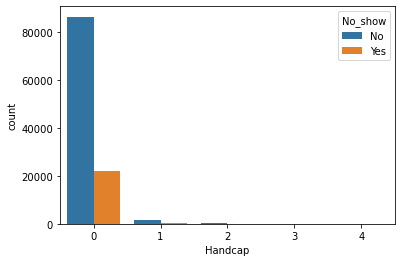

In [77]:
sns.countplot(x=df['Handcap'],hue=df['No_show']);

- most people who has no disapility attend 

## Dose SMS_received affect noshow ?

In [81]:
df.groupby(['SMS_received','No_show'])['No_show'].count()

SMS_received  No_show
0             No         62506
              Yes        12532
1             No         25697
              Yes         9784
Name: No_show, dtype: int64

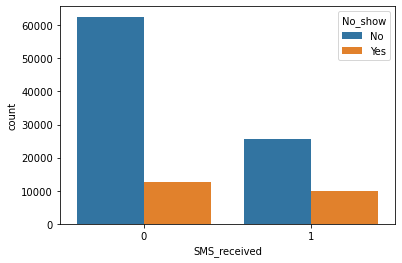

In [78]:
sns.countplot(x=df['SMS_received'],hue=df['No_show']);

- This seems strange because most of the people who did not receive the messages actually attended, unlike those who did, so there is no relationship between the attendance and the messages sent.

<a id='conclusions'></a>
## Conclusions
- at the end i found that more femal atend than male
- age has no effict 
- Neighbourhood affect data JARDIM CAMBURI has most freqency
- Scholarship,Diabetes and Alcoholism has the same effict 
- most people who has no disapility attend acording to Handcap
- and for SMS_received This seems strange because most of the people who did not receive the messages actually attended, unlike those who did, so there is no relationship between the attendance and the messages sent.
